In [ ]:
from sklearn.datasets import make_circles

# make 1000 circles
n_samples = 1000
X, y = make_circles(n_samples=n_samples, noise=0.03, random_state=42)
print(X.shape)
print(y.shape)

(1000, 2)
(1000,)


In [ ]:
X

array([[ 0.75424625,  0.23148074],
       [-0.75615888,  0.15325888],
       [-0.81539193,  0.17328203],
       ...,
       [-0.13690036, -0.81001183],
       [ 0.67036156, -0.76750154],
       [ 0.28105665,  0.96382443]])

In [ ]:
# make our data more organized
import pandas as pd

circle = pd.DataFrame({'x1': X[:, 0], 'x2': X[:, 1], 'y': y})
circle.head()

,x1,x2,y
0,0.754246,0.231481,1
1,-0.756159,0.153259,1
2,-0.815392,0.173282,1
3,-0.393731,0.692883,1
4,0.442208,-0.896723,0


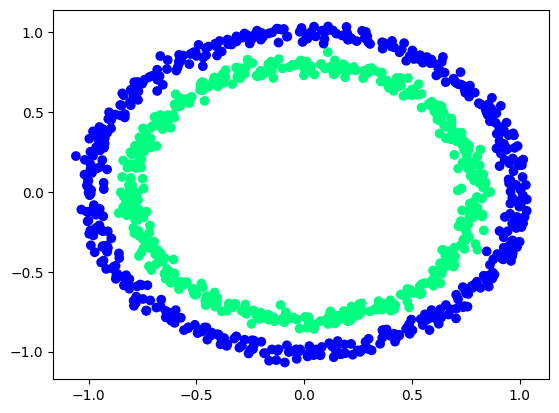

In [ ]:
# Visualize the data
import matplotlib.pyplot as plt

plt.scatter(circle['x1'], circle['x2'], c=circle['y'], cmap='winter')
plt.show()

**Creating Our Classification Model**

In [ ]:
import tensorflow as tf
model = tf.keras.Sequential([
    tf.keras.layers.Dense(1)
])

model.compile(loss=tf.keras.losses.BinaryCrossentropy(), optimizer=tf.keras.optimizers.SGD(), metrics=['accuracy'])

model.fit(circle[['x1', 'x2']], circle['y'], epochs=5)

Epoch 1/5
32/32 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.4822 - loss: 5.8401
Epoch 2/5
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.4924 - loss: 5.9929
Epoch 3/5
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.5094 - loss: 7.9082
Epoch 4/5
32/32 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step - accuracy: 0.5047 - loss: 7.9841
Epoch 5/5
32/32 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - accuracy: 0.5002 - loss: 8.0558


In [ ]:
# the model does an accuracy of 0.4848, let's try and improve the model
# let fit for more epochs
model.fit(circle[['x1', 'x2']], circle['y'], epochs=98)

Epoch 1/98
32/32 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - accuracy: 0.5065 - loss: 7.9539
Epoch 2/98
32/32 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - accuracy: 0.4895 - loss: 8.2280
Epoch 3/98
32/32 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - accuracy: 0.5071 - loss: 7.9454
Epoch 4/98
32/32 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step - accuracy: 0.4942 - loss: 8.1519
Epoch 5/98
32/32 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - accuracy: 0.4950 - loss: 8.1401
Epoch 6/98
32/32 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - accuracy: 0.4936 - loss: 8.1615
Epoch 7/98
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.5006 - loss: 8.0494
Epoch 8/98
32/32 ━━━━━━━━━━━━━━━━━━━━ 1s 19ms/step - accuracy: 0.4968 - loss: 8.1108
Epoch 9/98
32/32 ━━━━━━━━━━━━━━━━━━━━ 1s 21ms/step - accuracy: 0.4942 - loss: 8.1529
Epoch 10/98
32/32 ━━━━━━━━━━━━━━━━━━━━ 1s 19ms/step - accuracy: 0.4980 - loss: 8.0911
Epoch 11/98
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.5404 - loss: 7.4085
Epoch 12/98
32/32 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step - accuracy: 0.

In [ ]:
# since the model is still giving more like a guess result
# let's visualize the preduction using "plot_decision_boundary"
import numpy as np

def plot_decision_boundary(model, X, y):
    """
    Plots the decision boundary created by a model predicting X.
    """
    # define the axis boundary of the plot nd create a meshgrid
    x_min, x_max = X[:, 0].min() -0.1, X[:, 0].max() + 0.1
    y_min, y_max = X[:,0].min()-.1, X[:, 0].max() + 0.1
    xx, yy = np.meshgrid(np.linspace(x_min, x_max, 200),
                         np.linspace(y_min, y_max, 200))
    x_in = np.c_[xx.ravel(), yy.ravel()] # flatten the meshgrid

    # make predictions and plot the results
    y_pred = model.predict(x_in)

    # check for multi-class
    if len(y_pred[0]) > 1:
        print("doing multiclass classification")
        y_pred = np.argmax(y_pred, axis=1).reshape(xx.shape)
    else:
        print("doing binary classification")
        y_pred = np.round(y_pred).reshape(xx.shape)

    # plot decision boundries
    plt.contourf(xx, yy, y_pred, cmap=plt.cm.RdYlBu, alpha=0.7)
    plt.scatter(X[:, 0], X[:, 1], c=y, s=40, cmap=plt.cm.RdYlBu)
    plt.xlim(xx.min(), xx.max())
    plt.ylim(yy.min(), yy.max())


1250/1250 ━━━━━━━━━━━━━━━━━━━━ 1s 977us/step
doing binary classification


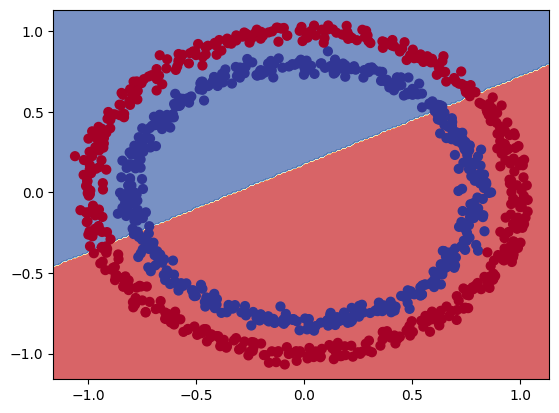

In [ ]:
plot_decision_boundary(model, X, y)

In [ ]:
# build first neural network with non-linear activation

tf.random.set_seed(42)
model_2 = tf.keras.Sequential([
    tf.keras.layers.Dense(1, activation=tf.keras.activations.relu),
])

model_2.compile(loss=tf.keras.losses.BinaryCrossentropy(),
                optimizer=tf.keras.optimizers.Adam(),
                metrics=['accuracy'])

model_2.fit(circle[['x1', 'x2']], circle['y'], epochs=100)

Epoch 1/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.4793 - loss: 6.0709
Epoch 2/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.4786 - loss: 6.0556 
Epoch 3/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.4789 - loss: 6.0550 
Epoch 4/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.4789 - loss: 6.0534 
Epoch 5/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.4789 - loss: 6.0519 
Epoch 6/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.4791 - loss: 6.0112
Epoch 7/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.4784 - loss: 5.9665 
Epoch 8/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.4777 - loss: 5.9521
Epoch 9/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.4777 - loss: 5.9235
Epoch 10/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.4777 - loss: 5.9170
Epoch 11/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.4801 - loss: 5.8696
Epoch 12/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accu

In [ ]:
X.shape, y.shape

((1000, 2), (1000,))

In [ ]:
# More hyperparameter turning
tf.random.set_seed(42)

model_3 = tf.keras.Sequential([

    tf.keras.layers.Dense(4, activation='relu'),
    tf.keras.layers.Dense(4, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

model_3.compile(loss=tf.keras.losses.BinaryCrossentropy(), optimizer=tf.keras.optimizers.Adam(), metrics=["accuracy"])
model_3.fit(circle[['x1', 'x2']], circle['y'], epochs=300, verbose=0)

1250/1250 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step
doing binary classification


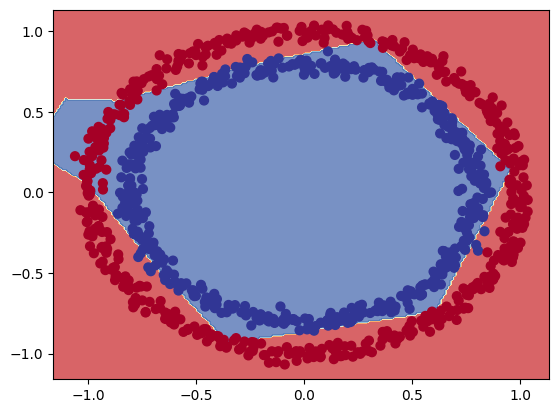

In [ ]:
plot_decision_boundary(model_3, X, y)

In [ ]:
model_3.evaluate(X, y)

32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9198 - loss: 0.2430


[0.23140199482440948, 0.9300000071525574]

In [ ]:
model_3.summary()


Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_2 (Dense)                      │ (None, 4)                   │              12 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 4)                   │              20 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_4 (Dense)                      │ (None, 1)                   │               5 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 113 (456.00 B)

 Trainable params: 37 (148.00 B)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 76 (308.00 B)

**What non-linear activation functions look like**

In [ ]:
# Sigmoid function f(x) = 1/1+exp(x)

def sigmoid(x):
    return 1/(1+tf.exp(-x))

# create a sample data
x = tf.cast(tf.range(-10, 10), tf.float32)
sigmoid(x), x

(<tf.Tensor: shape=(20,), dtype=float32, numpy=
 array([4.5397872e-05, 1.2339458e-04, 3.3535014e-04, 9.1105117e-04,
        2.4726233e-03, 6.6928510e-03, 1.7986210e-02, 4.7425874e-02,
        1.1920292e-01, 2.6894143e-01, 5.0000000e-01, 7.3105860e-01,
        8.8079703e-01, 9.5257413e-01, 9.8201376e-01, 9.9330717e-01,
        9.9752742e-01, 9.9908900e-01, 9.9966466e-01, 9.9987662e-01],
       dtype=float32)>,
 <tf.Tensor: shape=(20,), dtype=float32, numpy=
 array([-10.,  -9.,  -8.,  -7.,  -6.,  -5.,  -4.,  -3.,  -2.,  -1.,   0.,
          1.,   2.,   3.,   4.,   5.,   6.,   7.,   8.,   9.],
       dtype=float32)>)

Text(0.5, 1.0, 'Sigmoid Activation Function')

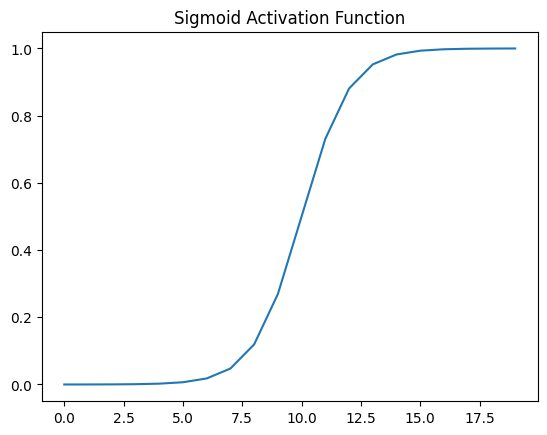

In [ ]:
plt.plot(sigmoid(x))
plt.title("Sigmoid Activation Function")

In [ ]:
# Split dataset
X_train, X_test, y_train, y_test = X[:800], X[800:], y[:800], y[800:]
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((800, 2), (200, 2), (800,), (200,))

In [ ]:
# lets tweak the learing rate parameter
tf.random.set_seed(42)

model_4  = tf.keras.Sequential([
    tf.keras.layers.Dense(4, activation='relu'),
    tf.keras.layers.Dense(4, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

model_4.compile(loss=tf.keras.losses.BinaryFocalCrossentropy(), optimizer=tf.keras.optimizers.Adam(learning_rate=0.01), metrics=["accuracy"])
history = model_4.fit(X_train, y_train, epochs=30, verbose=0)

In [ ]:
# Evaluate our model
model_4.evaluate(X_test, y_test)

7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.9873 - loss: 0.0200  


[0.02481108158826828, 0.9750000238418579]

1250/1250 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step
doing binary classification
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step
doing binary classification


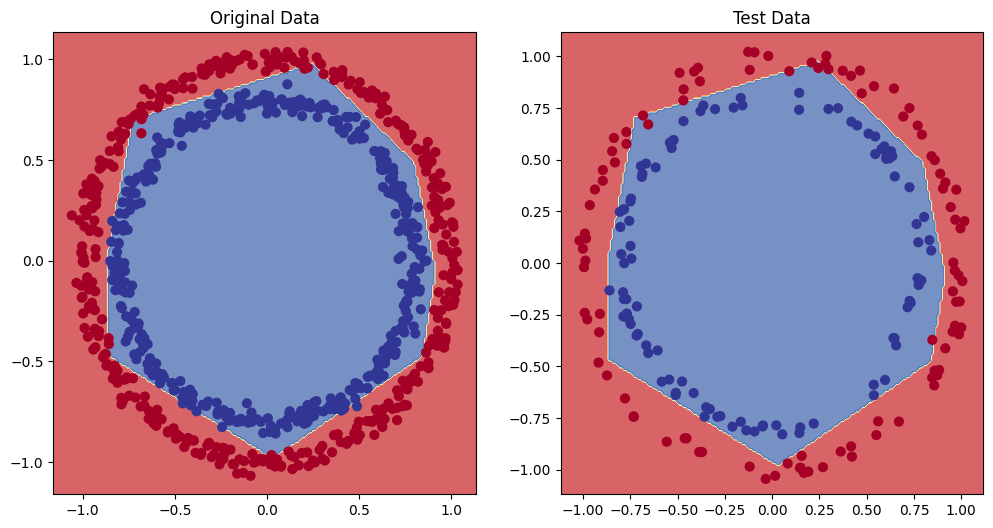

In [ ]:
# visualize
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.title("Original Data")
plot_decision_boundary(model_4,X_train, y_train)

plt.subplot(1, 2, 2)
plt.title("Test Data")
plot_decision_boundary(model_4,X_test, y_test)

<Axes: >

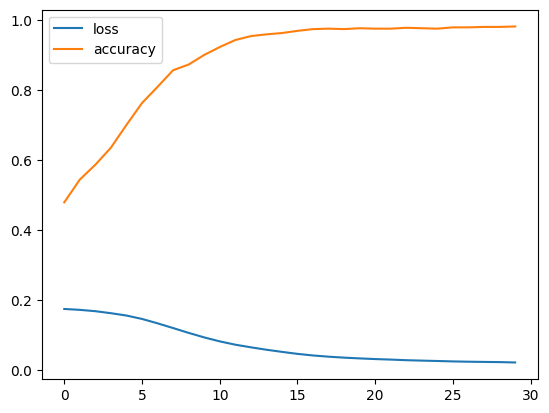

In [ ]:
history_df = pd.DataFrame(history.history)
history_df.loc[:, ['loss', 'accuracy']].plot()

**How to deduce the best learning rate for a classification problem **


In [ ]:
# create same model as model_4
model_5 = tf.keras.Sequential([
    tf.keras.layers.Dense(4, activation='relu'),
    tf.keras.layers.Dense(4, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

model_5.compile(loss=tf.keras.losses.BinaryCrossentropy(), optimizer=tf.keras.optimizers.Adam(), metrics=["accuracy"])

lr_scheduler = tf.keras.callbacks.LearningRateScheduler(lambda epoch: 1e-4 * 10**(epoch/20))
history_2 = model_5.fit(X_train, y_train, epochs=100, verbose=0, callbacks=[lr_scheduler])

In [ ]:
loss, evaluate = model_5.evaluate(X_test, y_test)
print(f"loss: {loss}, evaluate: {(evaluate*100):.2f}")


7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.5485 - loss: 0.7235  
loss: 0.7628004550933838, evaluate: 49.50


1250/1250 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step
doing binary classification
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step
doing binary classification


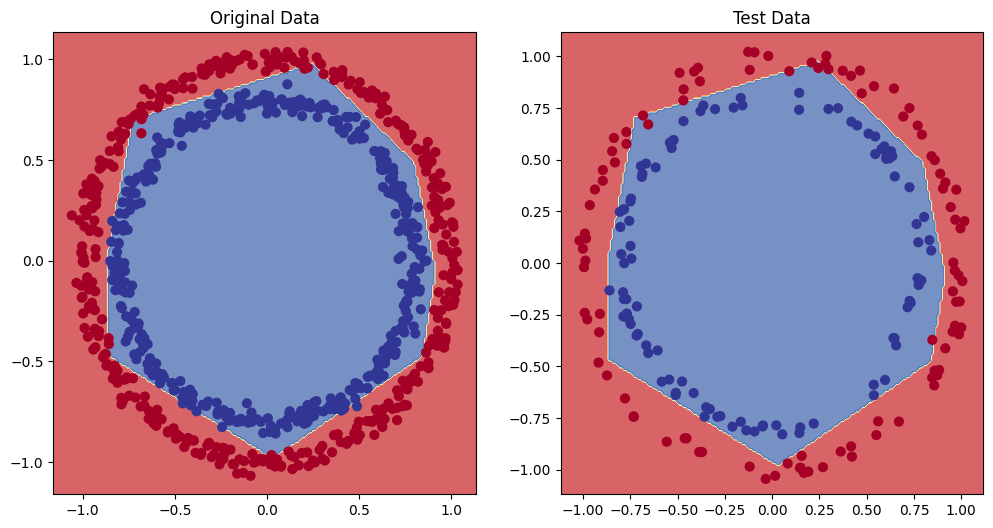

In [ ]:
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.title("Original Data")
plot_decision_boundary(model_4,X_train, y_train)

plt.subplot(1, 2, 2)
plt.title("Test Data")
plot_decision_boundary(model_4,X_test, y_test)

1250/1250 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step
doing binary classification
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step  
doing binary classification


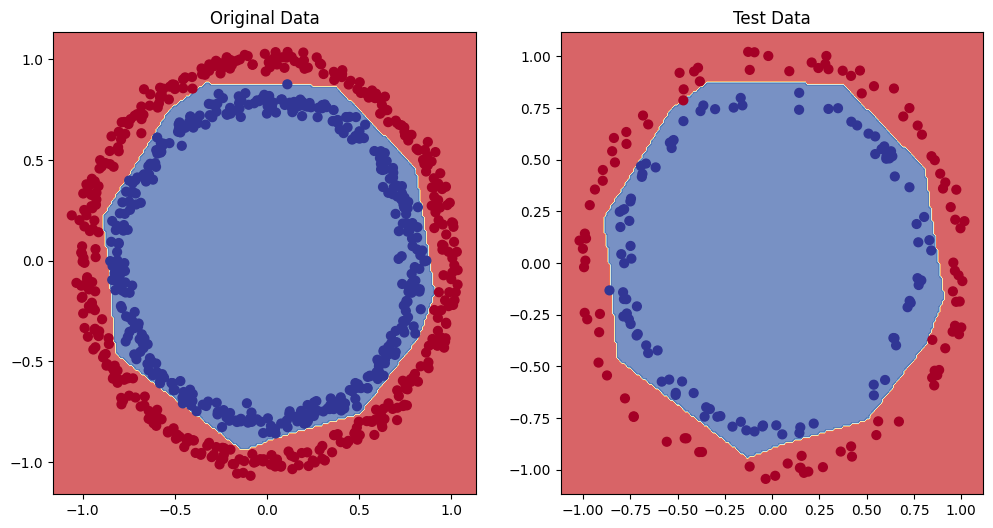

In [ ]:
model_6 = tf.keras.Sequential([
    tf.keras.layers.Dense(4, activation='relu'),
    tf.keras.layers.Dense(4, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

model_6.compile(loss=tf.keras.losses.BinaryCrossentropy(), optimizer=tf.keras.optimizers.Adam(learning_rate=0.01), metrics=["accuracy"])
model_6.fit(X_train, y_train, epochs=100, verbose=0)


plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.title("Original Data")
plot_decision_boundary(model_6,X_train, y_train)

plt.subplot(1, 2, 2)
plt.title("Test Data")
plot_decision_boundary(model_6,X_test, y_test)

In [ ]:
loss, evaluate = model_6.evaluate(X_test, y_test)
print(f"loss: {loss}, evaluate: {(evaluate*100):.2f}")

7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.9842 - loss: 0.0380  
loss: 0.03284939378499985, evaluate: 99.00


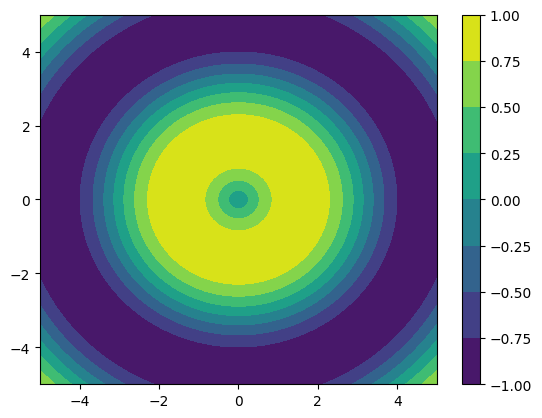

In [ ]:
import matplotlib.pyplot as plt

x = np.linspace(-5, 5, 100)
y = np.linspace(-5, 5, 100)
X, Y = np.meshgrid(x, y)
Z = np.sin(np.sqrt(X**2 + Y**2))

plt.contourf(X, Y, Z, cmap='viridis')
plt.colorbar()
plt.show()
